In [ ]:
import pandas as pd

In [ ]:


# creating dataframe
temp_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
})
temp_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [ ]:
# creating dataframe
wind_df = pd.DataFrame({
    "city": ["delhi","mumbai","banglore"],
    "windspeed": [12,5,10],
})
wind_df

,city,windspeed
0,delhi,12
1,mumbai,5
2,banglore,10


#**Basic Merge Using a Dataframe Column**

In [ ]:
df=pd.merge(temp_df,wind_df,on='city')
df

,city,temperature,windspeed
0,mumbai,32,5
1,delhi,45,12
2,banglore,30,10


#**Type Of DataBase Joins**

In [ ]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1


,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [ ]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [ ]:
df=pd.merge(df1,df2,on='city',how='inner')
df

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [ ]:
df=pd.merge(df1,df2,on='city',how='outer')
df

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


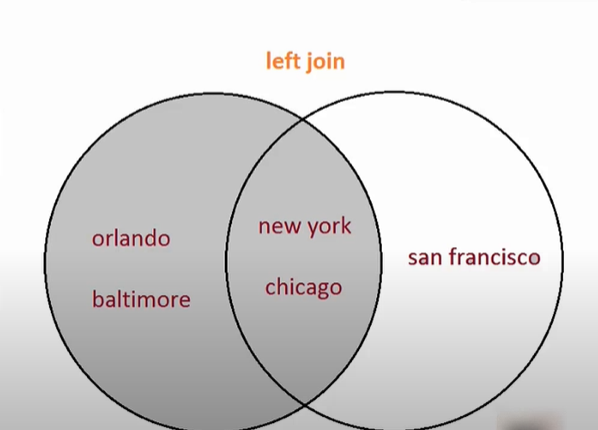

In [ ]:
df=pd.merge(df1,df2,on='city',how='left')
df

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [ ]:
df=pd.merge(df1,df2,on='city',how='right')
df

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san diego,NaN,71


#**Using indicator flag**

In [ ]:
df=pd.merge(df1,df2,on='city',how='outer',indicator=True)
df

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


#**suffixes**

In [ ]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [ ]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [ ]:
df3= pd.merge(df1,df2,on="city")
df3

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,new york,21,65,14,68
1,chicago,14,68,21,65


#using suffix while merging to denote the left or right data

In [ ]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


#**join**

In [ ]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1.set_index('city',inplace=True)
df1

,temperature
city,
new york,21
chicago,14
orlando,35


In [ ]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2.set_index('city',inplace=True)
df2

,humidity
city,
chicago,65
new york,68
orlando,75


In [ ]:
df1.join(df2)   # df1.join(df2,lsuffix='_left', rsuffix='_right') we can also use

,temperature,humidity
city,,
new york,21,68
chicago,14,65
orlando,35,75
